In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Historical_train.csv")
df.head()

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,52836,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,73653,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,30992,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,64361,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,8985,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0


In [3]:
df.shape

(53197, 14)

- data set consists of 53197 rows and 14 columns.

- The columns "Order",'Unnamed: 0' are dropped because they are just indicating the index or order no , which is not very uselful for our analysis and can be ignored

In [4]:
df.drop(columns=["Order",'Unnamed: 0'],inplace=True)

In [5]:
df.columns

Index(['File_Type', 'SKU_number', 'MarketingType', 'ReleaseNumber',
       'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ReleaseYear',
       'ItemCount', 'LowUserPrice', 'LowNetPrice', 'SoldFlag'],
      dtype='object')

In [6]:
df["File_Type"].unique()

array(['Historical'], dtype=object)

- we can drop "File_Type " because it has only one unique value which saya all the recirds are historical data , since its contribution is very les towards our analysis , we can drop it.

In [7]:
df.drop(columns=["File_Type"],inplace=True)

In [8]:
df.describe()

,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
count,5.319700e+04,53197.000000,53197.00000,5.319700e+04,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000
mean,6.526196e+05,4.125797,0.78824,1.216757e+06,99.004026,2005.971389,43.941651,56.455537,47.335423,0.171006
std,6.873272e+05,3.895184,0.40856,1.524907e+06,80.631333,6.098045,37.515901,99.006290,139.049743,0.376518
min,5.000100e+04,0.000000,0.00000,6.800000e+01,0.000000,1945.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700050e+05,2.000000,1.00000,2.432250e+05,49.950000,2003.000000,22.000000,20.190000,18.710000,0.000000
50%,5.409570e+05,3.000000,1.00000,7.155000e+05,78.950000,2007.000000,34.000000,44.000000,36.080000,0.000000
75%,7.597100e+05,6.000000,1.00000,1.552432e+06,127.950000,2010.000000,53.000000,79.590000,56.980000,0.000000
max,3.959831e+06,99.000000,1.00000,1.666966e+07,3986.310000,2016.000000,1426.000000,14140.210000,19138.790000,1.000000


In [9]:
df.head(15).style.highlight_max(color='orange').highlight_min(color='yellow')

,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,266198,S,0,0,1255901,32.500000,2004,26,27.570000,10.990000,0
1,2405151,S,0,0,208404,70.000000,1988,21,15.990000,40.020000,1
2,528384,D,9,1,50339,324.950000,2013,53,149.730000,123.940000,0
3,571691,S,4,1,1361255,39.950000,2005,67,10.590000,7.590000,0
4,2363274,D,1,0,3760024,144.000000,2004,13,43.940000,33.990000,0
5,919625,D,7,1,415071,257.750000,2010,50,86.990000,45.540000,0
6,162332,S,1,0,495212,115.000000,2009,14,0.000000,81.090000,0
7,313692,D,0,0,3687650,37.330000,2003,29,45.520000,4.330000,0
8,621965,S,1,0,34173,49.950000,2010,42,26.330000,30.980000,0
9,109242,S,5,1,2425217,43.030000,2005,20,41.490000,45.620000,0


- Visually we can observe that , when the "ReleaseNumber","PriceReg","LowUserPrice","LowNetPrice","ItemCount" are higher the SoldFlag is 0, which means the product is less likely to be sold 

In [10]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**- The report and statistics about the data will be submitted in google classroom along with jupyter notebook**

### Uni-Variate Analysis

In [11]:
df.columns

Index(['SKU_number', 'MarketingType', 'ReleaseNumber', 'New_Release_Flag',
       'StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount',
       'LowUserPrice', 'LowNetPrice', 'SoldFlag'],
      dtype='object')

In [12]:
df['SKU_number'].nunique()

53197

"SKU_number" - is acting as a primary key or column in our dataset, it is just the unique identifier 

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

### 'MarketingType'

In [14]:
df['MarketingType'].unique() #has two unique values 

array(['S', 'D'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


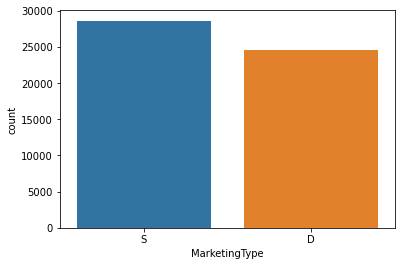

In [15]:
sns.countplot(df['MarketingType'])

- S Marketing type products are more.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


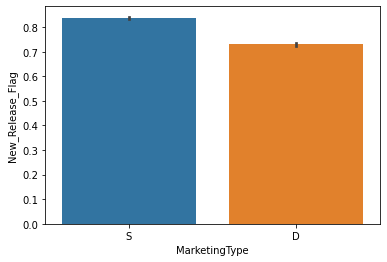

In [16]:
sns.barplot(df['MarketingType'],df['New_Release_Flag'])

- S - Marketing Type has higher new released flags, which means S type products have been released more than once.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


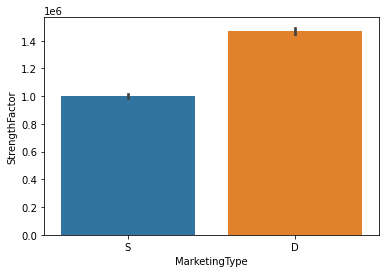

In [17]:
sns.barplot(df['MarketingType'],df['StrengthFactor'])

- D marketing type have more Strenghth Factor than S

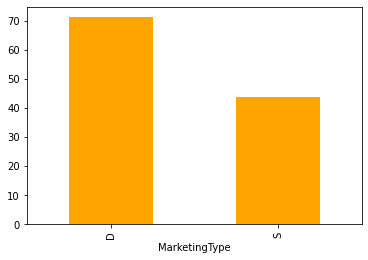

In [20]:
df.groupby("MarketingType").LowUserPrice.mean().sort_values(ascending=False)[:5].plot.bar(color="Orange")

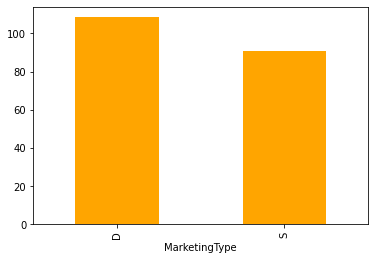

In [21]:
df.groupby("MarketingType").PriceReg.mean().sort_values(ascending=False)[:5].plot.bar(color="Orange")

S- Type have cheap ,average "LowUserPrice", and PriceReg

In [22]:
stack_bar=pd.crosstab(df['MarketingType'],df['SoldFlag'])


In [23]:
stack_bar

SoldFlag,0,1
MarketingType,,
D,18133,6431
S,25967,2666


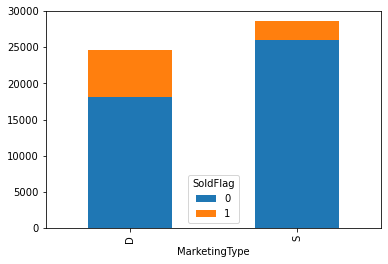

In [24]:
stack_bar.plot(kind='bar',stacked=True,grid=False)

#### Summary About MarketingType
- If the MarketingType of a product is D-Type it is more likely to be sold, than the S_Type, Although majority of Products have their MarketingType as S
- D-Type marketing more suggestable , because it has more strenghth Factor than S, and also the Average *"PriceReg"* and *"LowUserPrice"* are more than S type Marketing ,which should ensure profits.

## ReleaseNumber

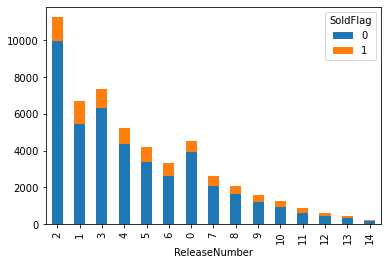

In [25]:
CT_RS=pd.crosstab(df['ReleaseNumber'],df['SoldFlag'])
CT_RS.head(15).sort_values(by=1,ascending=False).plot(kind='bar',stacked=True,grid=False)

- The higher the "ReleaseNumber" the less likely it is to be sold, The lower the "ReleaseNumber" , the product is most likely to be sold, the most optimum no of Releases a product should have to be sold is 2 Releases 

## StrengthFactor

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


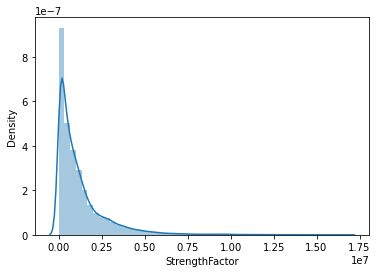

In [26]:
sns.distplot(df["StrengthFactor"])

- StreghthFactor is highly positive skewed data

In [27]:
log_SF=np.log(df['StrengthFactor'])
log_SF

0        14.043364
1        12.247234
2        10.826535
3        14.123918
4        15.139936
           ...    
53192    13.317150
53193    12.800443
53194    15.614929
53195    13.788502
53196    15.235952
Name: StrengthFactor, Length: 53197, dtype: float64

- Since the Strenghth factor is highly positive skewed, we have used log to scale down the column

<Figure size 720x576 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


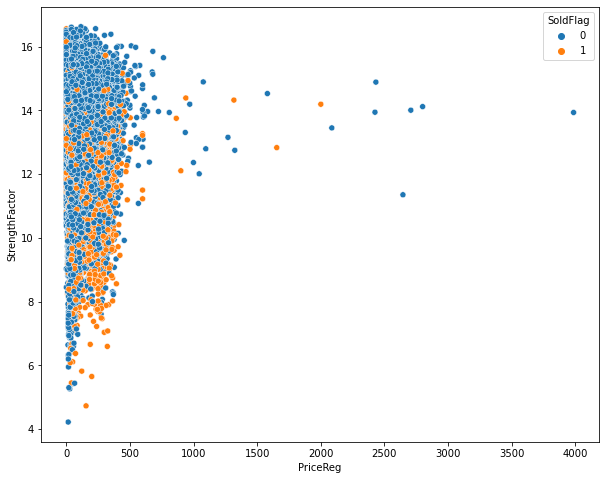

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['PriceReg'],log_SF,hue=df["SoldFlag"])

- The higher the PriceReg, the higher StrengthFactor

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


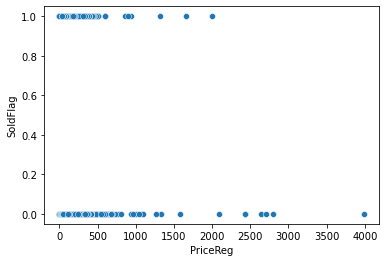

In [29]:
sns.scatterplot(df['PriceReg'],df["SoldFlag"])

- Just by looking at the PriceReg we cannot determine whether a product will be sold or not

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


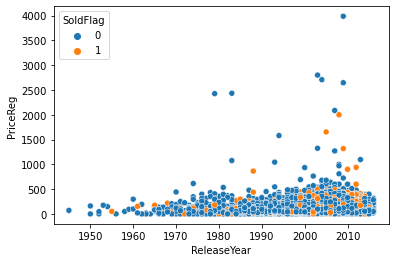

In [30]:
sns.scatterplot(df["ReleaseYear"],df["PriceReg"],hue=df["SoldFlag"])

- With the increase in ReleaseYear, the PriceReg is increasing to an extent.

### ItemsCount

### Summary of all columns

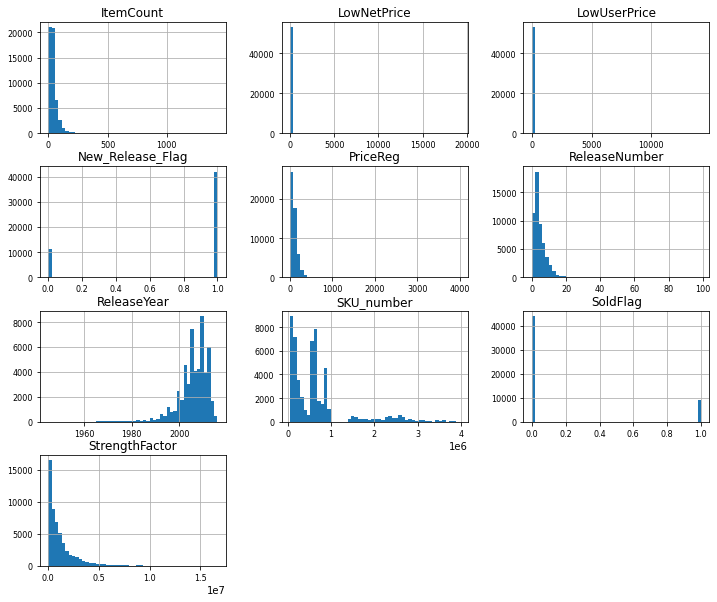

In [31]:
df.hist(figsize=(12, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [32]:
df.dtypes

SKU_number            int64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor        int64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
SoldFlag              int64
dtype: object

- To make our analysis easier let's separate the numerical and categorical columns

In [33]:
cat_df = df.select_dtypes(include = ['O'])
cat_df

,MarketingType
0,S
1,S
2,D
3,S
4,D
...,...
53192,S
53193,D
53194,D
53195,D


In [34]:
num_df = df.select_dtypes(exclude = ['O'])
num_df

,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,266198,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,2405151,0,0,208404,70.00,1988,21,15.99,40.02,1
2,528384,9,1,50339,324.95,2013,53,149.73,123.94,0
3,571691,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,2363274,1,0,3760024,144.00,2004,13,43.94,33.99,0
...,...,...,...,...,...,...,...,...,...,...
53192,3059530,0,0,607526,99.95,2003,22,253.92,99.76,0
53193,57540,11,1,362378,30.60,2006,87,93.98,18.97,1
53194,2471534,2,1,6046130,40.95,1996,16,0.00,32.48,0
53195,567658,8,1,973353,105.95,2008,45,52.69,23.99,0


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


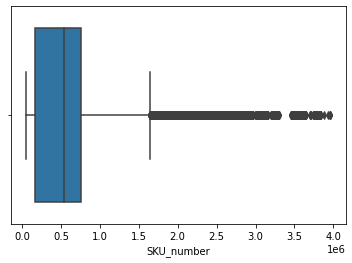

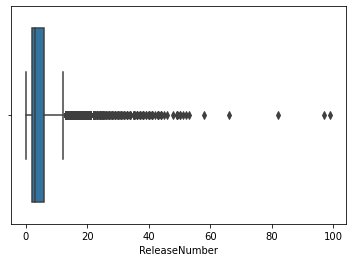

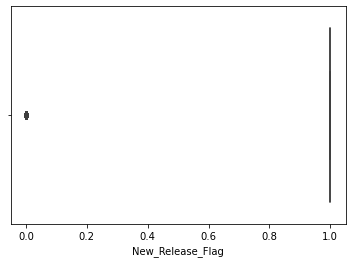

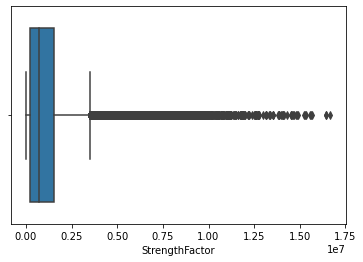

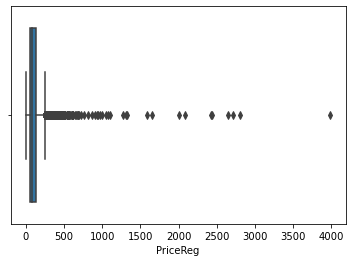

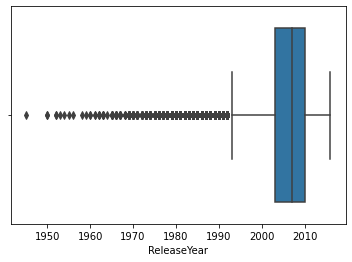

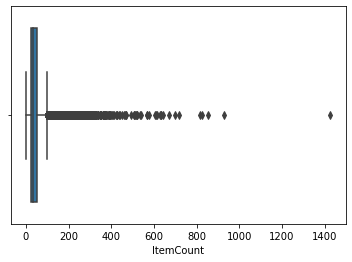

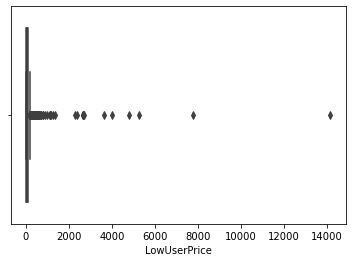

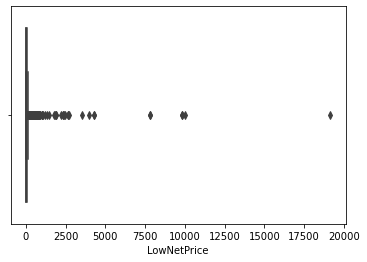

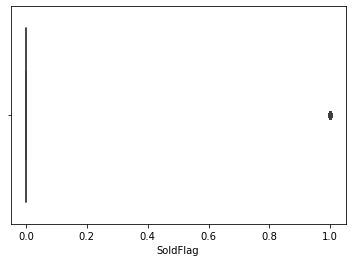

In [35]:
import matplotlib.pyplot as plt


for column in num_df:
    plt.figure()
    sns.boxplot(df[column])

- Almost all the columns have outliers

## Let's Understand the relationship between the attributes

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

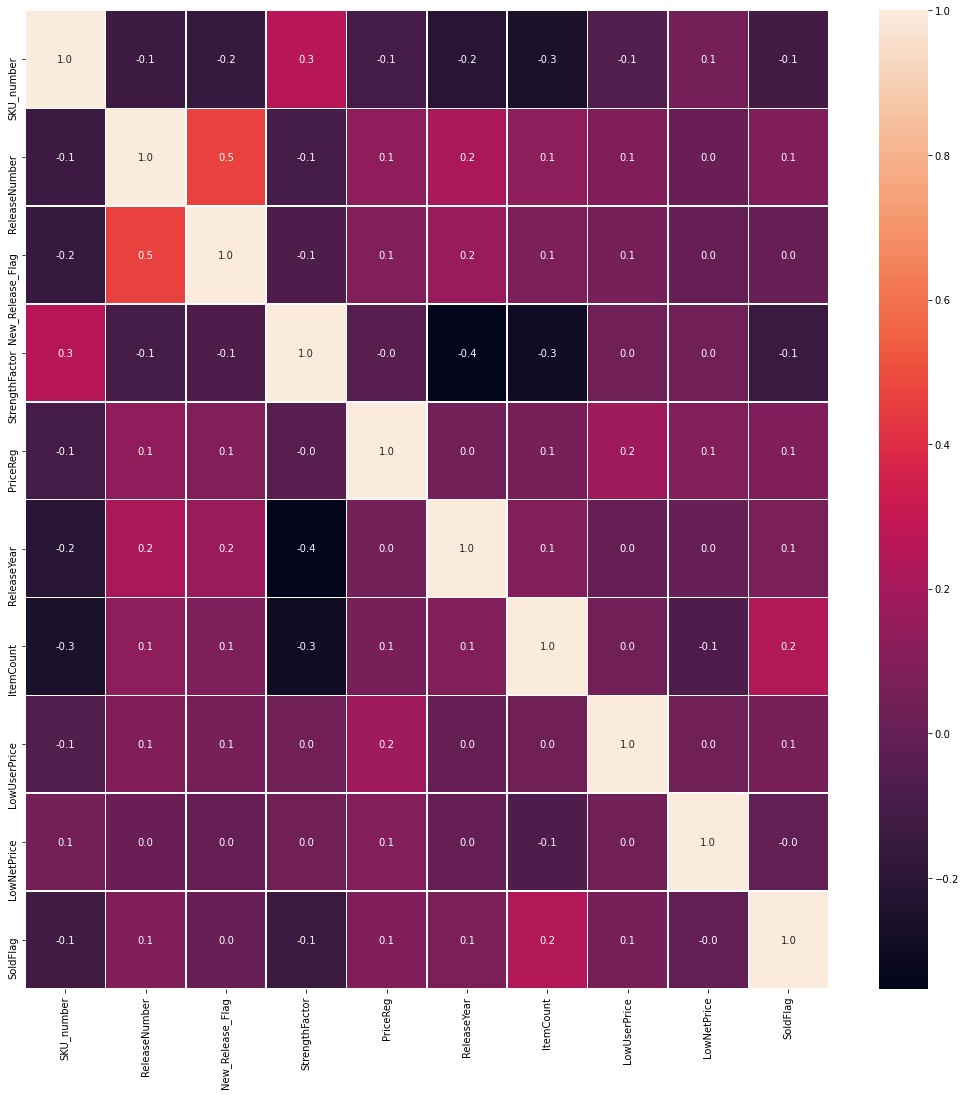

In [36]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt

- All the columns have very less correlation among themselves

### PreProcessing

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
import itertools
from sklearn.metrics import *


In [42]:
le = LabelEncoder()
df_mt= pd.DataFrame(le.fit_transform(df.MarketingType),columns = ["Marketing_Type"])
df_new = pd.concat([df,df_mt],axis = 1)
df_new.drop(columns="MarketingType",inplace=True)

In [43]:
df_new

,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,Marketing_Type
0,266198,0,0,1255901,32.50,2004,26,27.57,10.99,0,1
1,2405151,0,0,208404,70.00,1988,21,15.99,40.02,1,1
2,528384,9,1,50339,324.95,2013,53,149.73,123.94,0,0
3,571691,4,1,1361255,39.95,2005,67,10.59,7.59,0,1
4,2363274,1,0,3760024,144.00,2004,13,43.94,33.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...
53192,3059530,0,0,607526,99.95,2003,22,253.92,99.76,0,1
53193,57540,11,1,362378,30.60,2006,87,93.98,18.97,1,0
53194,2471534,2,1,6046130,40.95,1996,16,0.00,32.48,0,0
53195,567658,8,1,973353,105.95,2008,45,52.69,23.99,0,0


In [44]:
x = df_new.drop(columns = ['SoldFlag'],axis = 1)
x.head()

,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,Marketing_Type
0,266198,0,0,1255901,32.50,2004,26,27.57,10.99,1
1,2405151,0,0,208404,70.00,1988,21,15.99,40.02,1
2,528384,9,1,50339,324.95,2013,53,149.73,123.94,0
3,571691,4,1,1361255,39.95,2005,67,10.59,7.59,1
4,2363274,1,0,3760024,144.00,2004,13,43.94,33.99,0


In [45]:
y=df_new["SoldFlag"]
y.head()

0    0
1    1
2    0
3    0
4    0
Name: SoldFlag, dtype: int64

### Standardising the data

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [47]:
df_X=mms.fit_transform((x))


In [48]:
X = df_X
#dependant variable 
y= df_new['SoldFlag']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: SoldFlag, dtype: int64

## Train_test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37237, 10) (15960, 10) (37237,) (15960,)


## Model Application

# 1.Logistic Regression

In [50]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

<Figure size 360x216 with 0 Axes>

Text(0.5, 6.0, 'Predicted Values')

Text(24.0, 0.5, 'True Values')

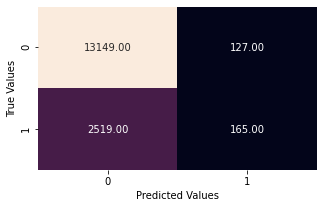

In [51]:
model_lg = LogisticRegression().fit(X_train,y_train)
pred_log = model_lg.predict(X_test)
prob_log= model_lg.predict_proba(X_test)

cm = confusion_matrix(y_test,pred_log)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['0','1'],
           yticklabels=['0','1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')



In [55]:
cr_lr = classification_report(y_test,pred_log)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     13276
           1       0.57      0.06      0.11      2684

    accuracy                           0.83     15960
   macro avg       0.70      0.53      0.51     15960
weighted avg       0.79      0.83      0.77     15960



In [57]:
kappa = cohen_kappa_score(y_test,pred_log) # Kappa Score
print('Kappa Score =',kappa)
# AUC score
roc_a = roc_auc_score(y_test,pred_log) 
print('AUC Score =',roc_a)

Kappa Score = 0.08054395710434858
AUC Score = 0.5259546377291204


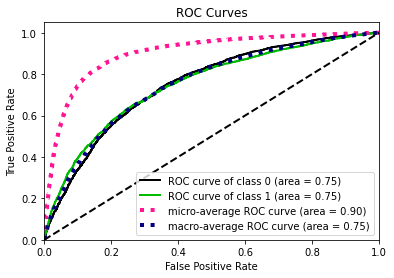

In [63]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,prob_log)
plt.show()


# 2.Decision Tree

In [64]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)


DecisionTreeClassifier()

In [65]:
cr_dt = classification_report(pred_dt,y_test)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     12910
           1       0.32      0.28      0.30      3050

    accuracy                           0.75     15960
   macro avg       0.58      0.57      0.57     15960
weighted avg       0.74      0.75      0.74     15960



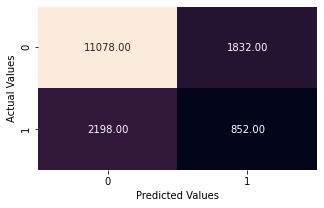

In [66]:
cm_dt = confusion_matrix(pred_dt,y_test)
plt.figure(figsize=(5,3))

sns.heatmap(cm_dt,annot=True,fmt='0.2f',xticklabels=['0','1'],
           yticklabels=['0','1'],cbar=False);
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values')
plt.show();

Accuracy for Decision Tree is very less - 75

# 3.Random Forest Classifier

In [67]:
mod_rf = RandomForestClassifier(n_estimators=20, criterion='gini',
                              max_features = 0.2)
mod_rf.fit(X_train,y_train)
pred_rf = mod_rf.predict(X_test)
prob_rf = mod_rf.predict_proba(X_test)

RandomForestClassifier(max_features=0.2, n_estimators=20)

<Figure size 360x216 with 0 Axes>

Text(0.5, 6.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

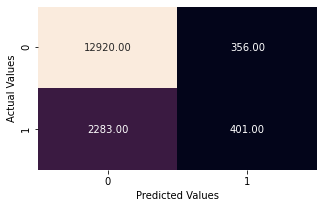

In [68]:
cm_rf = confusion_matrix(y_test,pred_rf)
plt.figure(figsize = (5,3))

sns.heatmap(cm_rf,annot = True,fmt = '0.2f',xticklabels=['0','1'],
           yticklabels=['0','1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [69]:
cr_rf = classification_report(y_test,pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     13276
           1       0.53      0.15      0.23      2684

    accuracy                           0.83     15960
   macro avg       0.69      0.56      0.57     15960
weighted avg       0.80      0.83      0.79     15960



In [70]:
kappa = cohen_kappa_score(y_test,pred_rf) # Kappa Score
print('Kappa Score =',kappa)
# AUC score
roc_a = roc_auc_score(y_test,pred_rf) # Kappa Score
print('AUC Score =',roc_a)

Kappa Score = 0.17179001291205953
AUC Score = 0.5612942844993531


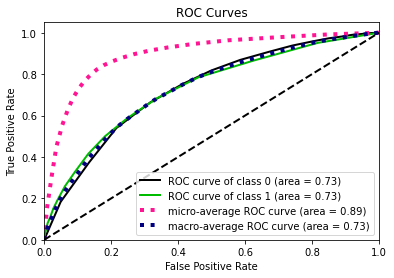

In [71]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,prob_rf)
plt.show()


In [72]:
import pandas as pd
feature_importances = pd.DataFrame(mod_rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [73]:
feature_importances

,importance
StrengthFactor,0.153482
ItemCount,0.146734
SKU_number,0.132009
LowUserPrice,0.129199
LowNetPrice,0.125229
PriceReg,0.124756
ReleaseYear,0.079377
ReleaseNumber,0.063551
Marketing_Type,0.038085
New_Release_Flag,0.007579


- With Random Forest accuracy has increased by 1% i.e.,84 

# 4.Ada Boosting on Random Forest

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
mod_ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10),random_state=12)
mod_ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10),
                   random_state=12)

In [76]:
pred_ada = mod_ada.predict(X_test)
prob_ada = mod_ada.predict_proba(X_test)

<Figure size 360x216 with 0 Axes>

Text(0.5, 6.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

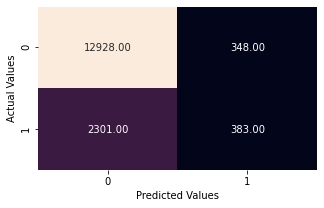

In [77]:
cm_ada = confusion_matrix(y_test,pred_ada)
plt.figure(figsize = (5,3))

sns.heatmap(cm_ada,annot = True,fmt = '0.2f',xticklabels=['0','1'],
           yticklabels=['0','1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [78]:
cr = classification_report(y_test,pred_ada)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     13276
           1       0.52      0.14      0.22      2684

    accuracy                           0.83     15960
   macro avg       0.69      0.56      0.57     15960
weighted avg       0.79      0.83      0.79     15960



In [79]:
roc_a = roc_auc_score(y_test,pred_ada) # Kappa Score
print('AUC Score =',roc_a)

AUC Score = 0.558242375897432


In [80]:
y_test

1457     1
19450    0
22364    0
38555    1
48544    0
        ..
4968     0
33896    0
42087    0
22392    0
30925    0
Name: SoldFlag, Length: 15960, dtype: int64

# 5.SVM

In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [82]:
mod = SVC(C = 1)
mod_svm = mod.fit(X_train,y_train)
pred_svm = mod_svm.predict(X_test)

In [83]:
cr = classification_report(y_test,pred_svm)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     13276
           1       0.00      0.00      0.00      2684

    accuracy                           0.83     15960
   macro avg       0.42      0.50      0.45     15960
weighted avg       0.69      0.83      0.76     15960



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision for 1 is 0 which means the model failed to predict the 1 correctly

In [84]:
algo_names=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","SVC"]
all_algo=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),SVC(C=1)]
acc = []
for mod in all_algo:
    model = mod
    model.fit(X_train, y_train)
    pred_all = model.predict(X_test)
    acc.append(accuracy_score(y_test,pred_all))
for i,n in enumerate(acc):
    acc_df=pd.DataFrame()
    acc_df["Algorithm"]=algo_names[i]
    acc_df["accuracy"]=n

LogisticRegression()

DecisionTreeClassifier()

RandomForestClassifier()

AdaBoostClassifier()

SVC(C=1)

In [88]:
acc

[0.8342105263157895,
 0.7469924812030075,
 0.8363408521303258,
 0.8384085213032582,
 0.8318295739348371]

In [89]:
acc_df= pd.DataFrame(np.array(acc),index= algo_names,columns=["Accuracy"])
acc_df.sort_values("Accuracy",ascending=False)

,Accuracy
AdaBoostClassifier,0.838409
RandomForestClassifier,0.836341
LogisticRegression,0.834211
SVC,0.831830
DecisionTreeClassifier,0.746992


## Testing The data

In [90]:
test_data=pd.read_csv("Historical_test_without_target.csv")
test_data.head()

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,36640,38309,Historical,114538,S,2,1,1349864,122.20,2003,25,16.24,10.94
1,24484,25026,Historical,259365,D,6,1,410348,56.00,2003,51,127.72,29.94
2,64696,72200,Historical,147658,S,1,0,92099,84.95,2011,20,0.00,0.00
3,65090,72652,Historical,148208,S,5,1,801001,185.95,2004,21,4.33,86.83
4,32653,33380,Historical,124687,D,2,1,1051302,65.00,2006,60,26.80,28.99


In [91]:
test_data.drop(columns=["Unnamed: 0","Order","File_Type"],inplace=True)

In [92]:
le = LabelEncoder()
df_mt= pd.DataFrame(le.fit_transform(test_data.MarketingType),columns = ["Marketing_Type"])
testdata_new = pd.concat([test_data,df_mt],axis = 1)
testdata_new.drop(columns="MarketingType",inplace=True)

In [93]:
testdata_new

,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,Marketing_Type
0,114538,2,1,1349864,122.20,2003,25,16.24,10.94,1
1,259365,6,1,410348,56.00,2003,51,127.72,29.94,0
2,147658,1,0,92099,84.95,2011,20,0.00,0.00,1
3,148208,5,1,801001,185.95,2004,21,4.33,86.83,1
4,124687,2,1,1051302,65.00,2006,60,26.80,28.99,0
...,...,...,...,...,...,...,...,...,...,...
22794,663930,18,1,18044,107.00,2013,44,41.99,58.52,1
22795,544565,10,1,9876,254.95,2013,113,120.17,79.27,0
22796,2404633,1,0,778672,55.00,1995,59,0.00,32.24,1
22797,877289,4,1,4947423,10.51,2008,47,129.31,11.53,1


In [94]:
min_max=MinMaxScaler()

In [95]:
test_data_x=mms.fit_transform((testdata_new))


In [96]:
test_data_N=pd.DataFrame(test_data_x,columns=testdata_new.columns)
test_data_N

,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,Marketing_Type
0,0.017015,0.026667,1.0,0.083488,0.058663,0.829268,0.016415,0.001623,0.001094,1.0
1,0.055202,0.080000,1.0,0.025374,0.026883,0.829268,0.033487,0.012767,0.002993,0.0
2,0.025748,0.013333,0.0,0.005689,0.040781,0.926829,0.013132,0.000000,0.000000,1.0
3,0.025893,0.066667,1.0,0.049538,0.089266,0.841463,0.013789,0.000433,0.008680,1.0
4,0.019691,0.026667,1.0,0.065020,0.031204,0.865854,0.039396,0.002679,0.002898,0.0
...,...,...,...,...,...,...,...,...,...,...
22794,0.161873,0.240000,1.0,0.001108,0.051366,0.951220,0.028890,0.004197,0.005850,1.0
22795,0.130400,0.133333,1.0,0.000603,0.122390,0.951220,0.074196,0.012012,0.007924,0.0
22796,0.620841,0.013333,0.0,0.048157,0.026403,0.731707,0.038739,0.000000,0.003223,1.0
22797,0.218129,0.053333,1.0,0.306014,0.005045,0.890244,0.030860,0.012926,0.001153,1.0


## Predictions

## Logistic model

In [97]:
prediction_lr =model_lg.predict(test_data_N)
test_pred_lg = pd.DataFrame({'SKU_Id':test_data_N.SKU_number ,'soldtag':prediction_lr})


In [100]:
test_pred_lg
test_pred_lg.to_csv('test_pred_lg.csv', index = False)

,SKU_Id,soldtag
0,0.017015,0
1,0.055202,0
2,0.025748,0
3,0.025893,0
4,0.019691,0
...,...,...
22794,0.161873,0
22795,0.130400,1
22796,0.620841,0
22797,0.218129,0


## 2.Decision Tree 

In [101]:
model_dt
prediction_dt =model_dt.predict(test_data_N)
test_pred_dt = pd.DataFrame({'SKU_Id':test_data_N.SKU_number ,'soldtag':prediction_dt})


DecisionTreeClassifier()

In [102]:
test_pred_dt
test_pred_dt.to_csv('test_pred_dt.csv', index = False)

,SKU_Id,soldtag
0,0.017015,0
1,0.055202,0
2,0.025748,1
3,0.025893,0
4,0.019691,0
...,...,...
22794,0.161873,1
22795,0.130400,1
22796,0.620841,0
22797,0.218129,0


## 3. RandomForest

In [103]:
prediction_rf =mod_rf.predict(test_data_N)
test_pred_rf = pd.DataFrame({'SKU_Id':test_data_N.SKU_number ,'soldtag':prediction_rf})


In [104]:
test_pred_rf
test_pred_rf.to_csv('test_pred_rf.csv', index = False)

,SKU_Id,soldtag
0,0.017015,0
1,0.055202,0
2,0.025748,0
3,0.025893,0
4,0.019691,0
...,...,...
22794,0.161873,0
22795,0.130400,1
22796,0.620841,0
22797,0.218129,0


## 4. ADA Boosting

In [105]:
prediction_ada =mod_ada.predict(test_data_N)
test_pred_ada = pd.DataFrame({'SKU_Id':test_data_N.SKU_number ,'soldtag':prediction_ada})


In [106]:
test_pred_ada
test_pred_ada.to_csv('test_pred_ada.csv', index = False)

,SKU_Id,soldtag
0,0.017015,0
1,0.055202,0
2,0.025748,0
3,0.025893,0
4,0.019691,0
...,...,...
22794,0.161873,0
22795,0.130400,1
22796,0.620841,0
22797,0.218129,0


## 5. SVM

In [107]:
prediction_svm =mod_svm.predict(test_data_N)
test_pred_svm = pd.DataFrame({'SKU_Id':test_data_N.SKU_number ,'soldtag':prediction_svm})


In [108]:
test_pred_svm
test_pred_svm.to_csv('test_pred_svm.csv', index = False)

,SKU_Id,soldtag
0,0.017015,0
1,0.055202,0
2,0.025748,0
3,0.025893,0
4,0.019691,0
...,...,...
22794,0.161873,0
22795,0.130400,0
22796,0.620841,0
22797,0.218129,0


In [109]:
test_pred_svm["soldtag"].unique()

array([0], dtype=int64)

In [110]:
Conclusion:
    I recomend using Logistic Regression because it is giving highest accuracy,precision and Recall , which means our

SyntaxError: invalid syntax (<ipython-input-110-e136cec8a04b>, line 1)